In [64]:
from pathlib import Path

PATH = Path('../data/raw/ecoco_depthmaps_test')
sequence_dirs = sorted(list(PATH.glob('*')))

In [100]:
from matplotlib import pyplot as plt
import numpy as np

from dynamic_fusion.utils.network import to_numpy
from dynamic_fusion.utils.visualization import create_red_blue_cmap, img_to_colormap
import cv2

I = 5

for I in range(10):
    sequence = sequence_dirs[I]

    voxel_grid_dir = sequence / 'VoxelGrid-betweenframes-5'
    voxel_grid_paths = sorted(list(voxel_grid_dir.glob('*.npy')))

    voxel_grids = [np.load(path) for path in voxel_grid_paths]

    boundary_timestamps = voxel_grid_dir / 'boundary_timestamps.txt'

    f = boundary_timestamps.read_text().split('\n')
    voxel_grid_timestamps = {int(x[0]) : (float(x[1]), float(x[2])) for x in [line.split() for line in f[:-1]]}
    image_dir = sequence / 'frames'
    image_paths = sorted(list(image_dir.glob('*.png')))

    images = [cv2.imread(str(path)) for path in image_paths]



    size = tuple(voxel_grids[0].shape[-2:])
    out = cv2.VideoWriter(f"ecoco/{I}.mp4", cv2.VideoWriter.fourcc(*"mp4v"), len(voxel_grid_timestamps) // (list(voxel_grid_timestamps.values())[-1][1]), (size[1]*2, size[0]))

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.4
    font_color = (255, 255, 255)  # White color
    line_type = 1
    position = (10, 10)  # Position of the text (bottom left corner)

    all_frames = []

    for i, (eps, image, timestamps) in enumerate(zip(voxel_grids, images, voxel_grid_timestamps.values())):
        colored_event_polarity_sum = img_to_colormap(eps.sum(axis=0), create_red_blue_cmap(501))

        evr =  abs(eps).sum(axis=0).mean() / (timestamps[1] - timestamps[0])

        frame_processed = (colored_event_polarity_sum * 255).astype(np.uint8)
        frame_processed = np.concatenate((image, frame_processed), axis=0)



        cv2.putText(frame_processed, f"Events per second per pixel={evr:.2f}", position, font, font_scale, font_color, line_type)


        out.write(frame_processed)
    out.release()


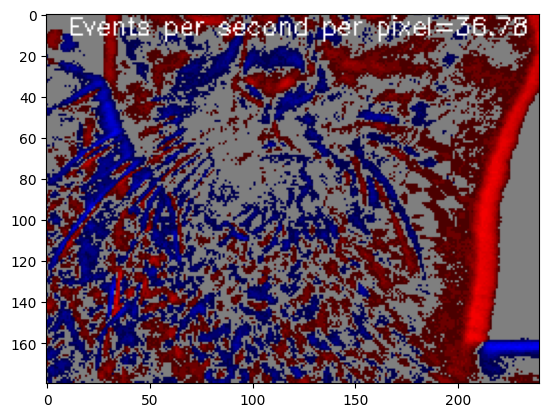

In [69]:
plt.imshow(frame_processed)

In [29]:
60000/(180*240)

1.3888888888888888

In [31]:
(abs(voxel_grids[4]).sum(axis=0)).sum()

54632.293

In [26]:
abs(voxel_grids[0]).sum(axis=0).sum()

59114.793